## <a name="pres">Présentation</a>

In [1]:
# import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as st

In [2]:
# chargement de données
data = pd.read_csv("p2-arbres-fr.csv", sep=";")
data.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [3]:
# taille du dataset
data.shape

(200137, 18)

Le jeu de données brut présente 200 137 individus ayant 18 variables.  
A noter que sur le site, au moment de cette étude, il y avait 205 398 individus. Le nombre a augmenté depuis la dernière mise à disposition du jeu de données sur la fiche de la mission.

In [4]:
# valeurs manquantes
valeurs_manquantes = data.isnull().mean()
print(valeurs_manquantes)

id                     0.000000
type_emplacement       0.000000
domanialite            0.000005
arrondissement         0.000000
complement_addresse    0.845596
numero                 1.000000
lieu                   0.000000
id_emplacement         0.000000
libelle_francais       0.007480
genre                  0.000080
espece                 0.008754
variete                0.816241
circonference_cm       0.000000
hauteur_m              0.000000
stade_developpement    0.335795
remarquable            0.315274
geo_point_2d_a         0.000000
geo_point_2d_b         0.000000
dtype: float64


* Aucune valeur dans la colonne `numero`.  
* Les colonnes `complement_addresse` et `variete` ont un manque de plus de 80% des données. Mais ces deux colonnes sont des compléments sur des informations. Elles ne seront donc pas essentielles a priori.  
* Concernant les colonnes `stade_developpement` et `remarquable`, le manque est moindre avec environ 30%.
    + Pour la colonne `remarquable`, on peut supposer que s'il n'y a aucune valeur, c'est que l'arbre n'est pas remarquable. Le contraire aurait été expressément notifié.
    + Pour le stade de développement, on pourra tenter d'extrapoler en faisant la moyenne sur les tailles et circonférences en fonction du stade de développement des autres individus en fonction de l'espèce.
* Les autres colonnes ont moins de 1% de manque et font référence à des noms ou a des types d'emplacement. Il ne devrait pas y avoir d'impact sur notre étude.

In [5]:
# type de données
data.dtypes

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

* L'identifiant unique `id`, la circonférence (cm) et la hauteur (m) sont tous de type entier.  
* Le numéro `numero` est un nombre à décimals, mais la colonne est vide comme vu précédemment.  
* Les coordonnées `geo_point_2d_a` et `geo_point_2d_b` sont des nombres à décimals, ce qui est normal.  
* La colonne `remarquable` est également un nombre à décimals alors qu'il s'agit d'un booléen ayant pour valeur 0 ou 1. Si nous avons besoin de faire des calculs dessus, il vaut mieux le laisser ainsi.  
* Toutes les autres colonnes sont des chaînes de caractères. Ce qui est cohérent avec le fait qu'ils s'agissent de dénominations.  
* A noter cependant la colonne `id_emplacement` est bien une chaîne de caraactères car certains identifiant sont alphanumériques.

In [6]:
# nettoyage des données
data.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


Pour les dimensions, on observe des outliers a priori.  
La hauteur et la circonférence d'un arbre à Paris ne devrait pas atteindre respectivement les 881 km et les 250 m.

***

## <a name="nett">Nettoyage</a>

In [7]:
genres = data["genre"].unique()
especes = data["espece"].unique()
varietes = data["variete"].unique()
print("Genres : " + str(len(genres)))
print("Espèces : " + str(len(especes)))
print("Variétés : " + str(len(varietes)))

Genres : 176
Espèces : 540
Variétés : 437


In [8]:
domanialites = data["domanialite"].unique()
arrondissements = data["arrondissement"].unique()
lieux = data["lieu"].unique()
print("Domanialites : " + str(len(domanialites)))
print("Arrondissements : " + str(len(arrondissements)))
print("Lieux : " + str(len(lieux)))

Domanialites : 10
Arrondissements : 25
Lieux : 6921


In [9]:
# remarquable à null à mettre à 0
remarquable_null = data.loc[data["remarquable"].isnull(), "remarquable"]
data.loc[data["remarquable"].isnull(), "remarquable"] = 0.0

In [10]:
# nettoyage de la colonne genre
nb_genre_nan = data.loc[data["genre"].isnull(),:]
# 16 valeurs
data.loc[data["genre"].isnull(),"genre"] = "Autre"

# pareil pour la domanialité
data.loc[data["domanialite"].isnull(), "domanialite"] = "Autre"

# pareil pour le stade de développement
data.loc[data["stade_developpement"].isnull(), "stade_developpement"] = "Autre"

***

### <a name="dime">Dimensions</a>

In [11]:
# comptage des valeurs égale à 0
circ_a_zero = data.loc[data["circonference_cm"]==0]
haut_a_zero = data.loc[data["hauteur_m"]==0]
dime_a_zero_ou = data.loc[(data["circonference_cm"]==0) | (data["hauteur_m"]==0)]
dime_a_zero_et = data.loc[(data["circonference_cm"]==0) & (data["hauteur_m"]==0)]
print("Circ. à zéro : ", len(circ_a_zero), " - ", len(circ_a_zero)/len(data))
print("Haut. à zéro : ", len(haut_a_zero), " - ", len(haut_a_zero)/len(data))
print("Les 2 à zéro : ", len(dime_a_zero_et), " - ", len(dime_a_zero_et)/len(data))
print("Au moins 1 des deux à zéro : ", len(dime_a_zero_ou), " - ", len(dime_a_zero_ou)/len(data))

Circ. à zéro :  25867  -  0.1292464661706731
Haut. à zéro :  39219  -  0.19596076687469083
Les 2 à zéro :  25501  -  0.12741771886257913
Au moins 1 des deux à zéro :  39585  -  0.1977895141827848


| Circonférence | Hauteur | Les 2 | Au moins 1 |
| --- | --- | --- | --- |
| 25 867 | 39 219 | 25 501 | 39 585 |

Pour les valeurs à zéro on met la valeur minimale qui est 1m et 1cm. Ainsi nous avons des valeurs physiques utilisables. En effet, un arbre de 20cm demandera le même type d'entretien qu'un arbre de 1m.

In [12]:
# on cale les hauteurs de zéro à 1m
data.loc[data["hauteur_m"]==0,"hauteur_m"] = 1

# on cherche la valeur min pour les circonférences pour caler la valeur des zéros à ce min
reste_circ = data.loc[data["circonference_cm"]!=0,:].sort_values("circonference_cm", ascending=True)
data.loc[data["circonference_cm"]==0,"circonference_cm"] = 1

# on regarde à nouveau les données
data.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,200137.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.509726,13.306470,0.000919,48.854491,2.348208
std,5.456032e+05,NaN,673.174288,1971.216123,0.030307,0.030234,0.051220
min,9.987400e+04,NaN,1.000000,1.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


Pour les valeurs max, on utilise la limite des outliers qui est 1.5*IQR+quart0.75

In [13]:
# on va maintenant s'occuper des valeurs max
dim_to_process = ["hauteur_m", "circonference_cm"]
genres = data["genre"].unique()
calage_max = {}
# pour chaque type de dimension
for dim in dim_to_process:    
    # pour chaque genre d'arbre
#     print("Dimension : ", dim)
    calage_max[dim] = {}
    for gen in genres:
        subset = data.loc[data["genre"] == gen,:]
        quartiles = [np.percentile(subset[dim], p) for p in [25, 75]]
        IQR = quartiles[1]-quartiles[0]
        borne_max = 1.5*IQR+quartiles[1]
#         print("-------------------------------")
#         print("Genre : ", gen)
#         print("IQR : ", IQR)
#         print("borne max : ", borne_max)
        calage_max[dim][gen] = math.ceil(borne_max)

In [14]:
# maintenant on remplace les dimensions
for dim in dim_to_process:
    sub_cal = calage_max[dim]
    for gen in genres:
        neo_max = sub_cal[gen]
        data.loc[(data["genre"] == gen) & (data[dim]>neo_max),dim] = neo_max    

data.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,200137.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,79.195811,8.530477,0.000919,48.854491,2.348208
std,5.456032e+05,NaN,60.912531,5.909310,0.030307,0.030234,0.051220
min,9.987400e+04,NaN,1.000000,1.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,479.000000,41.000000,1.000000,48.911485,2.469759


### <a name="circ">Circonférence</a>

<a name="g_diame">Graphique représentant le diamètre</a>

moyenne :  25.208809544120854
médiane :  22.281692032865347
mode :  0    0.31831
Name: diametre_cm, dtype: float64
min :  0.3183098861837907
max :  152.47043548203573
variance :  375.93380426151975
écart-type :  19.389012462256034
coefficient de variation :  0.7691363778333554
skewness :  0.860605705066366
kurtosis :  0.5863862468257497


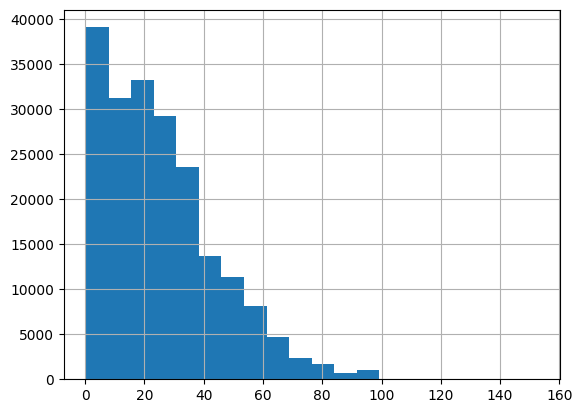

In [15]:
# circonférence
# calcul du diametre en centimètre
data["diametre_cm"] = data["circonference_cm"]/math.pi
data["diametre_cm"].hist(bins=20)
# mesures de tendances centrales
print("moyenne : ", data["diametre_cm"].mean())
print("médiane : ", data["diametre_cm"].median())
print("mode : ", data["diametre_cm"].mode())
print("min : ", data["diametre_cm"].min())
print("max : ", data["diametre_cm"].max())
# mesures de dispersion
print("variance : ", data["diametre_cm"].var(ddof=0))
print("écart-type : ", data["diametre_cm"].std(ddof=0))
print("coefficient de variation : ", data["diametre_cm"].std(ddof=0)/data["diametre_cm"].mean())
# mesures de forme
print("skewness : ", data["diametre_cm"].skew())
print("kurtosis : ", data["diametre_cm"].kurtosis())
plt.show()

Outliers évidents avec 800m et 400m de diamètre.  
En revanche, pour savoir quelles sont les autres outliers, il faut procéder avec un boxplot.

In [16]:
# histogramme des circonférences
# data["circonference_cm"].hist(bins=20)
# # mesures de tendances centrales
# print("moyenne : ", subset["circonference_cm"].mean())
# print("médiane : ", subset["circonference_cm"].median())
# print("mode : ", subset["circonference_cm"].mode())
# # mesures de dispersion
# print("variance : ", subset["circonference_cm"].var(ddof=0))
# print("écart-type : ", subset["circonference_cm"].std(ddof=0))
# print("coefficient de variation : ", subset["circonference_cm"].std(ddof=0)/subset["circonference_cm"].mean())
# # mesures de forme
# print("skewness : ", subset["circonference_cm"].skew())
# print("kurtosis : ", subset["circonference_cm"].kurtosis())
# plt.show()

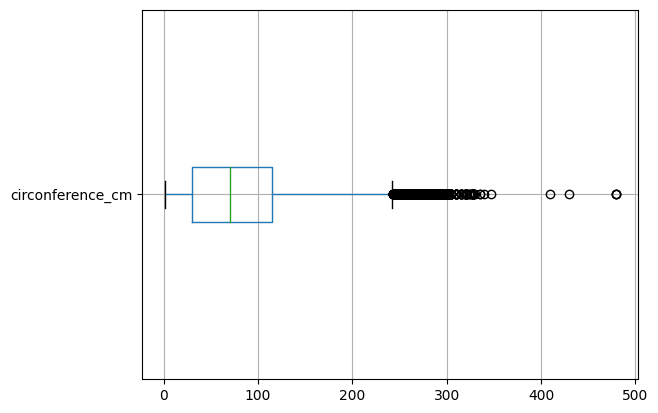

In [17]:
# faire un box plot pour trouver les outliers
data.boxplot(column="circonference_cm", vert=False, showfliers=True)
plt.show()

In [18]:
# on fait un boxplot par genre -- rien de concluant --
# genres = data["genre"].unique()
# for gen in genres:
#     subset = data.loc[data["genre"] == gen,:]
#     print("-"*80)
#     print("Il y a ", len(subset), " individus du genre ", gen)
#     print("moyenne : ", subset["circonference_cm"].mean())
#     print("médiane : ", subset["circonference_cm"].median())
#     print("mode : ", subset["circonference_cm"].mode())
#     print("variance : ", subset["circonference_cm"].var(ddof=0))
#     print("écart-type : ", subset["circonference_cm"].std(ddof=0))
#     print("skewness : ", subset["circonference_cm"].skew())
#     print("kurtosis : ", subset["circonference_cm"].kurtosis())
#     subset["circonference_cm"].hist()
#     plt.show()
#     subset.boxplot(column="circonference_cm", vert=False)
#     plt.show()

In [19]:
# on fait un boxplot par espèce !! très lent !!
# especes = data["espece"].unique()
# for esp in especes:
#     subset = data.loc[data["espece"] == esp,:]
#     print("-"*80)
#     print("Il y a ", len(subset), " individus de l'espèce ", esp)
#     print("moyenne : ", subset["circonference_cm"].mean())
#     print("médiane : ", subset["circonference_cm"].median())
#     print("mode : ", subset["circonference_cm"].mode())
#     print("variance : ", subset["circonference_cm"].var(ddof=0))
#     print("écart-type : ", subset["circonference_cm"].std(ddof=0))
#     print("skewness : ", subset["circonference_cm"].skew())
#     print("kurtosis : ", subset["circonference_cm"].kurtosis())
#     subset.boxplot(column="circonference_cm", vert=False)
#     plt.show()

In [20]:
# on fait un boxplot par stade de développement -- complètement inutile --
# stades = data["stade_developpement"].unique()
# for sta in stades:
#     subset = data.loc[data["stade_developpement"] == sta,:]
#     print("-"*80)
#     print("Il y a ", len(subset), " individus de l'espèce ", sta)
#     print("moyenne : ", subset["circonference_cm"].mean())
#     print("médiane : ", subset["circonference_cm"].median())
#     print("mode : ", subset["circonference_cm"].mode())
#     print("variance : ", subset["circonference_cm"].var(ddof=0))
#     print("écart-type : ", subset["circonference_cm"].std(ddof=0))
#     print("skewness : ", subset["circonference_cm"].skew())
#     print("kurtosis : ", subset["circonference_cm"].kurtosis())
#     subset.boxplot(column="circonference_cm", vert=False)
#     plt.show()

In [21]:
# on fait un boxplot par arrondissement -- pas concluant --
# arrondiss = data["arrondissement"].unique()
# for aro in arrondiss:
#     subset = data.loc[data["arrondissement"] == aro,:]
#     print("-"*80)
#     print("Il y a ", len(subset), " individus dans l'arrondissement ", aro)
#     print("moyenne : ", subset["circonference_cm"].mean())
#     print("médiane : ", subset["circonference_cm"].median())
#     print("mode : ", subset["circonference_cm"].mode())
#     print("variance : ", subset["circonference_cm"].var(ddof=0))
#     print("écart-type : ", subset["circonference_cm"].std(ddof=0))
#     print("skewness : ", subset["circonference_cm"].skew())
#     print("kurtosis : ", subset["circonference_cm"].kurtosis())
#     subset.boxplot(column="circonference_cm", vert=False)
#     plt.show()

***

### <a name="haut">Hauteur</a>

In [22]:
# hauteur
# on regarde que les arbres au delà de 31m de hauteur, record sur Paris
# etude_hauteur = data.loc[data['hauteur_m']>31, :]
# etude_hauteur = etude_hauteur.sort_values("hauteur_m", ascending=False)
# print(etude_hauteur.shape)
# etude_hauteur.head(10)

On observe plus de 558 individus faisant plus de 31m (67m dans le reste de la France).  
Pareil, il va falloir utiliser des boxplot pour gérer les outliers.

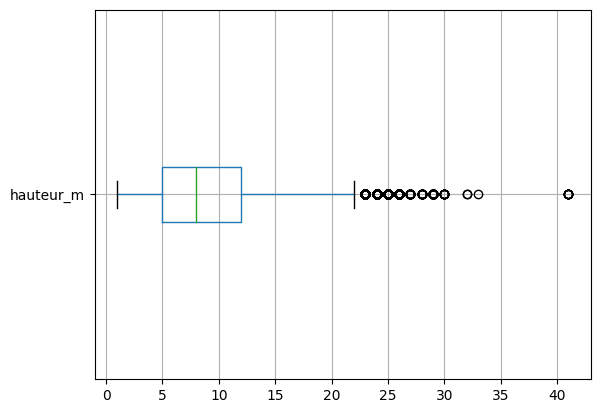

In [23]:
# faire un box plot pour trouver les outliers
data.boxplot(column="hauteur_m", vert=False, showfliers=True)
plt.show()

<a name="g_haute"> Graphique représentant la répartition de la hauteur</a>

moyenne :  1.0
médiane :  1.0
mode :  0    1
Name: hauteur_m, dtype: int64
min :  1
max :  41
variance :  0.0
écart-type :  0.0
coefficient de variation :  0.6927274557730537
skewness :  nan
kurtosis :  nan


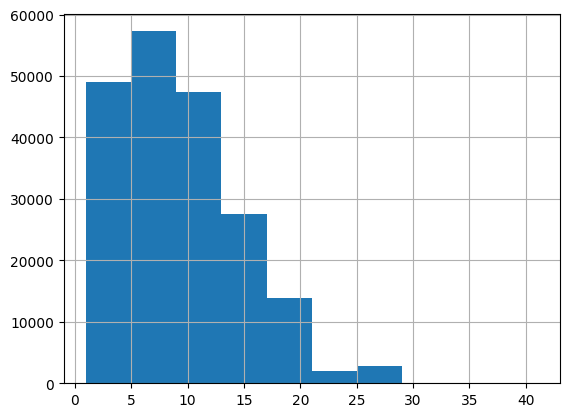

In [24]:
# histogramme des hauteurs
data["hauteur_m"].hist(bins=10)
# mesures de tendances centrales
print("moyenne : ", subset["hauteur_m"].mean())
print("médiane : ", subset["hauteur_m"].median())
print("mode : ", subset["hauteur_m"].mode())
print("min : ", data["hauteur_m"].min())
print("max : ", data["hauteur_m"].max())
# mesures de dispersion
print("variance : ", subset["hauteur_m"].var(ddof=0))
print("écart-type : ", subset["hauteur_m"].std(ddof=0))
print("coefficient de variation : ", data["hauteur_m"].std(ddof=0)/data["hauteur_m"].mean())
# mesures de forme
print("skewness : ", subset["hauteur_m"].skew())
print("kurtosis : ", subset["hauteur_m"].kurtosis())
plt.show()

In [25]:
# on fait un boxplot par arrondissement -- pas concluant --
# arrondiss = data["arrondissement"].unique()
# for aro in arrondiss:
#     subset = data.loc[data["arrondissement"] == aro,:]
#     print("-"*80)
#     print("Il y a ", len(subset), " individus dans l'arrondissement ", aro)
#     print("moyenne : ", subset["hauteur_m"].mean())
#     print("médiane : ", subset["hauteur_m"].median())
#     print("mode : ", subset["hauteur_m"].mode())
#     print("variance : ", subset["hauteur_m"].var(ddof=0))
#     print("écart-type : ", subset["hauteur_m"].std(ddof=0))
#     print("skewness : ", subset["hauteur_m"].skew())
#     print("kurtosis : ", subset["hauteur_m"].kurtosis())
#     subset.boxplot(column="hauteur_m", vert=False)
#     plt.show()

In [26]:
# on fait un boxplot par genre --  --
# genres = data["genre"].unique()
# for gen in genres:
#     subset = data.loc[data["genre"] == gen,:]
#     print("-"*80)
#     print("Il y a ", len(subset), " individus du genre ", gen)
#     print("moyenne : ", subset["hauteur_m"].mean())
#     print("médiane : ", subset["hauteur_m"].median())
#     print("mode : ", subset["hauteur_m"].mode())
#     print("variance : ", subset["hauteur_m"].var(ddof=0))
#     print("écart-type : ", subset["hauteur_m"].std(ddof=0))
#     print("skewness : ", subset["hauteur_m"].skew())
#     print("kurtosis : ", subset["hauteur_m"].kurtosis())
#     subset["hauteur_m"].hist(bins=30)
#     plt.show()
#     subset.boxplot(column="hauteur_m", vert=False)
#     plt.show()

***

<a name="g_corr_h_d">Graphique corrélation entre hauteur et diamètre</a>

Coeff de Pearson :  0.7790968603469114
Covariance :  89.26533560664092


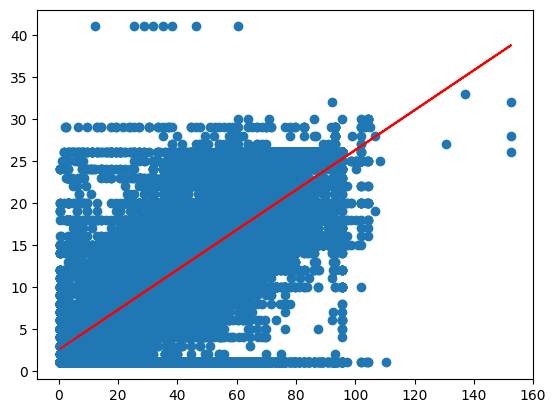

In [27]:
# faire un plot entre diametre et hauteur
plt.plot(data["diametre_cm"], data["hauteur_m"], "o")
m, b = np.polyfit(data["diametre_cm"], data["hauteur_m"], 1)
plt.plot(data["diametre_cm"], m*data["diametre_cm"]+b, color='red')

print("Coeff de Pearson : ", st.pearsonr(data["diametre_cm"], data["hauteur_m"])[0])
print("Covariance : ", np.cov(data["diametre_cm"], data["hauteur_m"],ddof=0)[1,0])

plt.show()

In [28]:
# histogramme de la répartition par arrondissement
arrondiss = data["arrondissement"].unique()
data.loc[data["arrondissement"].str.contains('ARRDT'),"arrond"] = data.loc[data["arrondissement"].str.contains('ARRDT'),"arrondissement"].str.split(' ').str[1].str[:-1]
data.loc[data["arrondissement"]=='VAL-DE-MARNE',"arrond"] = 94
data.loc[data["arrondissement"]=='SEINE-SAINT-DENIS',"arrond"] = 93
data.loc[data["arrondissement"]=='HAUTS-DE-SEINE',"arrond"] = 92
data.loc[data["arrondissement"]=='BOIS DE VINCENNES',"arrond"] = 94
data.loc[data["arrondissement"]=='BOIS DE BOULOGNE',"arrond"] = 92
data.loc[data["arrond"]=='1E',"arrond"] = 1
data.arrond = data.arrond.astype(int)

<a name="g_arrond">Graphique répartition arbre par arrondissement/département</a>

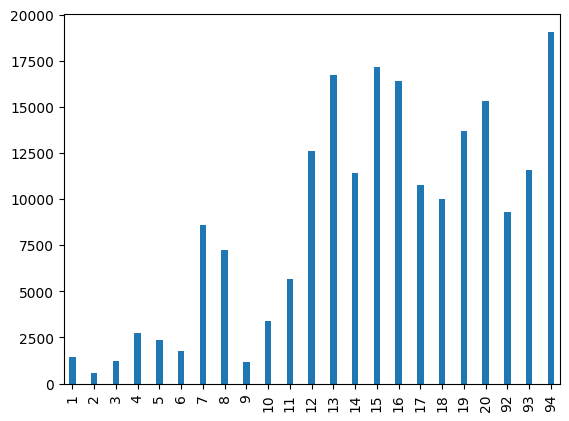

In [29]:
data["arrond"].value_counts(normalize=False).sort_index().plot(kind='bar', width=0.3)
plt.show()

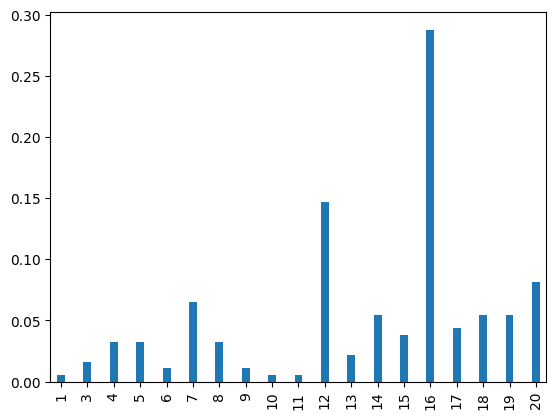

In [30]:
# pour les arbres remarquables
data.loc[data["remarquable"]==1,"arrond"].value_counts(normalize=True).sort_index().plot(kind='bar', width=0.3)
plt.show()

In [31]:
# 
arrond_unique = sorted(data.arrond.unique())
superficie_arrond = pd.DataFrame(
{
    "arrond": arrond_unique,
    "superficie": [1.83, 0.99, 1.17, 1.60, 2.54, 2.15, 4.09, 3.88, 2.18, 2.89, 3.67, 6.37, 7.15, 5.64, 4.84, 7.91, 5.67, 6.01, 6.79, 5.98, 176, 236, 245]
})
count_arrond = data["arrond"].value_counts().sort_index()
count_arrond = pd.DataFrame(count_arrond).reset_index()
count_arrond.columns = ['arrond', 'counts']

population_arbre = pd.merge(count_arrond, superficie_arrond, how='inner', on='arrond')
population_arbre["pop"] = population_arbre["counts"]/population_arbre["superficie"]

# plt.plot(population_arbre['superficie'], population_arbre['counts'], 'o')

<a name="g_density">Graphique représentant la densité de population des arbres pour chaque arrondissement</a>

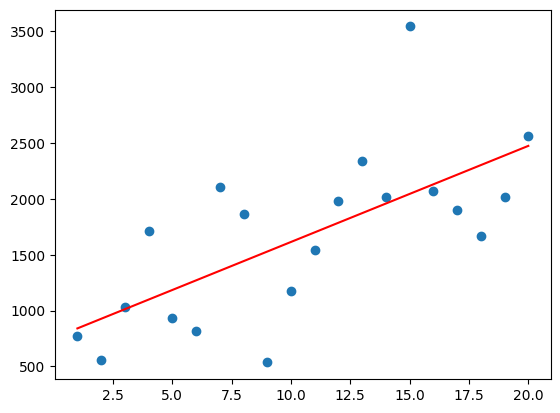

In [32]:
# on ne regarde pas la petite couronne parce que la surface est beaucoup plus importante. la densité diminue donc drastiquement
plt.plot(population_arbre["arrond"][:-3], population_arbre["pop"][:-3], 'o')
m, b = np.polyfit(population_arbre["arrond"][:-3], population_arbre["pop"][:-3], 1)
plt.plot(population_arbre["arrond"][:-3], m*population_arbre["arrond"][:-3]+b, color='red')
plt.show()

In [33]:
# X = population_arbre["arrond"][:-3]
# plt.plot(X, population_arbre["pop"][:-3], 'o')
# a, b, c = np.polyfit(population_arbre["arrond"][:-3], population_arbre["pop"][:-3], 2)
# plt.plot(X, a*X**2+b*X+c, color='red')
# plt.show()

In [34]:
# X = population_arbre["arrond"][:-3]
# plt.plot(X, population_arbre["pop"][:-3], 'o')
# a, b, c, d = np.polyfit(population_arbre["arrond"][:-3], population_arbre["pop"][:-3], 3)
# plt.plot(X, a*X**3+b*X**2+c*X+d, color='red')
# plt.show()

         5         4         3         2
0.05172 x - 2.782 x + 53.71 x - 447.2 x + 1600 x - 756.6


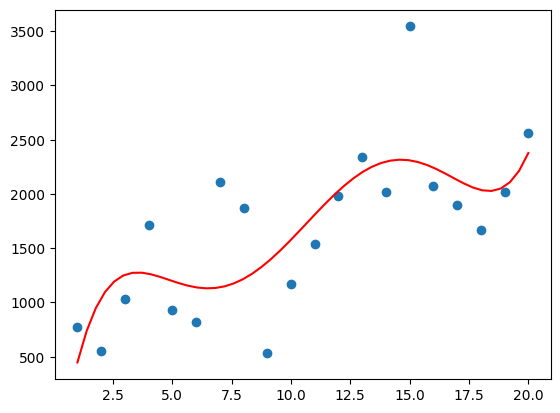

In [35]:
mymodel = np.poly1d(np.polyfit(population_arbre["arrond"][:-3], population_arbre["pop"][:-3], 5))
print(mymodel)
myline = np.linspace(1, 20)
plt.scatter(population_arbre["arrond"][:-3], population_arbre["pop"][:-3])
plt.plot(myline, mymodel(myline), color='red')
plt.show() 

En fonction de la hauteur de l'arbre, on a besoin de différentes nacelles :  
- inf. 3 m : pas besoin
- de 3 à 20 m : nacelles sur porteur
- sup. 20 m : nacelles à flèche téléscopique

In [40]:
list_X = ['domanialite', 'arrondissement', 'genre', 'stade_developpement', 'remarquable'] # qualitative
list_Y = ['hauteur_m', 'diametre_cm', 'geo_point_2d_a'] # quantitative
# geo_point_2d_a et geo_point_2d_b
for X in list_X:
    for Y in list_Y:
        temp_eta = eta_squared(data[X],data[Y])
        print("Qualit : ", X, " / Quant : ", Y, " --> eta : ", temp_eta)

Qualit :  domanialite  / Quant :  hauteur_m  --> eta :  0.08672813643905626
Qualit :  domanialite  / Quant :  diametre_cm  --> eta :  0.019533689574470013
Qualit :  domanialite  / Quant :  geo_point_2d_a  --> eta :  0.008140423766052354
Qualit :  arrondissement  / Quant :  hauteur_m  --> eta :  0.09700156119550395
Qualit :  arrondissement  / Quant :  diametre_cm  --> eta :  0.07006110720398516
Qualit :  arrondissement  / Quant :  geo_point_2d_a  --> eta :  0.9015791194530289
Qualit :  genre  / Quant :  hauteur_m  --> eta :  0.21153355240243873
Qualit :  genre  / Quant :  diametre_cm  --> eta :  0.17090158289577642
Qualit :  genre  / Quant :  geo_point_2d_a  --> eta :  0.048007839404066194
Qualit :  stade_developpement  / Quant :  hauteur_m  --> eta :  0.4725216373915541
Qualit :  stade_developpement  / Quant :  diametre_cm  --> eta :  0.4523189800282271
Qualit :  stade_developpement  / Quant :  geo_point_2d_a  --> eta :  0.00479946892115959
Qualit :  remarquable  / Quant :  hauteur_m  